In [1]:



import urllib.request
import os

original_dir = "original_captchas"

if not os.path.exists(original_dir):
    os.makedirs(original_dir)

imgURL = "http://www.erpstcourier.com/captcha/captcha.php?rand=146398747"

for i in range(10):
    print(i)

    urllib.request.urlretrieve(imgURL, f"{original_dir}/{i}.png")

0
1
2
3
4
5
6
7
8
9


In [9]:
import os
original_dir = "original_captchas"

captchas_images = []

for filename in os.listdir(original_dir):
    
    print(os.path.join(original_dir, filename))
    captchas_images.append(os.path.join(original_dir, filename))

original_captchas/4.png
original_captchas/5.png
original_captchas/6.png
original_captchas/7.png
original_captchas/8.png
original_captchas/0.png
original_captchas/1.png
original_captchas/9.png
original_captchas/2.png
original_captchas/3.png


In [10]:
try:
    from PIL import Image
except ImportError:
    import Image


import imutils

import cv2
import numpy as np

solved_captchas_dir='solved_captchas'
import os
if not os.path.exists(solved_captchas_dir):
    os.makedirs(solved_captchas_dir)


def solve(image_path):

    print(image_path)
    # image= Image.open('18.png')
    image = cv2.imread(image_path)
    # print(image.shape)

    frame = image[0:40, 20:100] 

    # cv2.imshow('frame',frame)

    # 28 40 82
    # 154 165 193

    # lower_black = np.array([28,0,20],dtype = "uint16" )
    # upper_black = np.array([230,230,230], dtype = "uint16")
    # black_mask = cv2.inRange(frame, lower_black, upper_black)


    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # lower_range = np.array([120,0,0])
    # upper_range = np.array([150,255,255])

    # 231 61 22
    # 226 21 72


    # mask = cv2.inRange(hsv, lower_range, upper_range)


        # Blue color
    low_blue = np.array([100, 10, 20])
    high_blue = np.array([126, 255, 255])
    blue_mask = cv2.inRange(hsv, low_blue, high_blue)
    blue = cv2.bitwise_and(frame, frame, mask=blue_mask)

    black_pixels = np.where(
        (blue[:, :, 0] == 0) & 
        (blue[:, :, 1] == 0) & 
        (blue[:, :, 2] == 0)
    )

    # set those pixels to white
    blue[black_pixels] = [255, 255, 255]




    gray = cv2.cvtColor(blue, cv2.COLOR_BGR2GRAY)

    invet_gray  = 255- gray

    img_bw = 255*(invet_gray).astype('uint8')

    element = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    mask = cv2.erode(img_bw, element, iterations = 1)
    mask = cv2.dilate(mask, element, iterations = 1)
    mask = cv2.erode(mask, element)

    mask = np.dstack([mask, mask, mask]) / 255

    masked =  (hsv* mask)





    cv2.imwrite('solved_captchas/tmp.png', masked)

    temp = 255- cv2.imread("solved_captchas/tmp.png")

    img_grey = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)




    # define a threshold, 128 is the middle of black and white in grey scale
    thresh = 250

    # threshold the image
    img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]





    cv2.imwrite('solved_captchas/tmp.png', img_binary)



    # image_frame=threshed


    # gray = cv2.cvtColor(blue, cv2.COLOR_BGR2GRAY)
    # thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    # for c in cnts:
    #     if cv2.contourArea(c) < 50:
    #         cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

    # result = 255 - thresh
    # cv2.imshow('result', result)









    image_frame = cv2.imread("solved_captchas/tmp.png")


    # cv2.imshow('mask0',black_mask)

    # Simple image to string




    # cv2.imshow('result', image_frame)


    import pytesseract
    detected=pytesseract.image_to_string(image_frame, lang='eng', config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyz')
    # print('Detected: ', detected)

    import re
    onlytextnumber = re.sub('[\W_]+', '', detected)
    
    result = onlytextnumber[-4:]


    return [image_frame ,result]









original_captchas/4.png


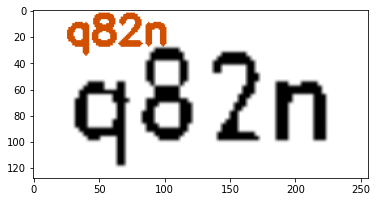

Captcha q82n
original_captchas/5.png


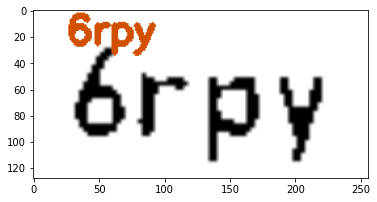

Captcha 6rpy
original_captchas/6.png


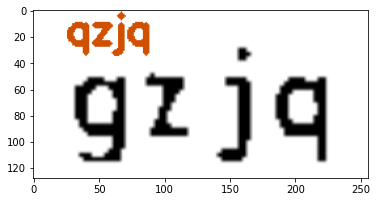

Captcha qzjq
original_captchas/7.png


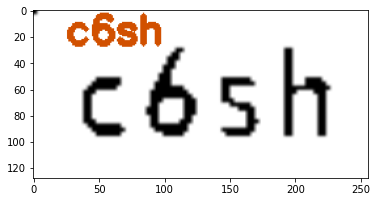

Captcha c6sh
original_captchas/8.png


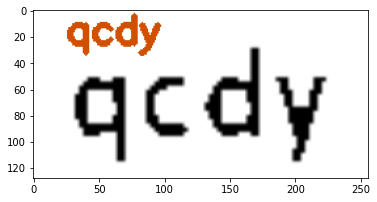

Captcha qcdy
original_captchas/0.png


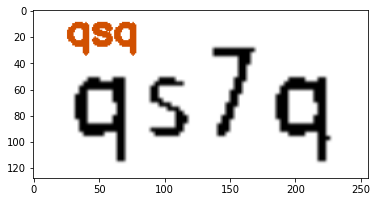

Captcha qsq
original_captchas/1.png


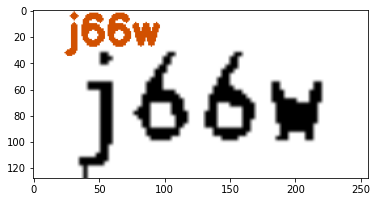

Captcha j66w
original_captchas/9.png


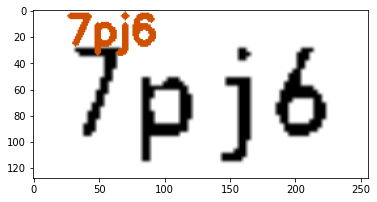

Captcha 7pj6
original_captchas/2.png


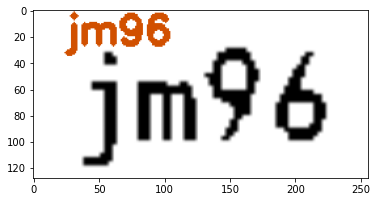

Captcha jm96
original_captchas/3.png


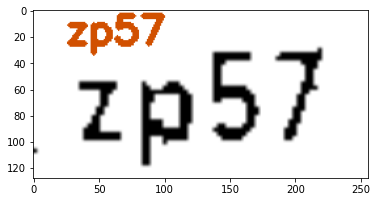

Captcha zp57


In [11]:
import matplotlib.pyplot as plt

results=[]

for image in captchas_images:
    result=solve(image)
    results.append(result)
    img=result[0]
#     height, width, depth = img.shape
#     desired_height = 128
#     aspect_ratio = desired_height/width
#     dimension = (desired_height, height*aspect_ratio)
    result[0] = cv2.resize(img,(256,128))

    cv2.putText(
          result[0], #numpy array on which text is written
          result[1], #text
          (25,25), #position at which writing has to start
          cv2.FONT_HERSHEY_SIMPLEX, #font family
          1, #font size
          (209, 80, 0, 255), #font color
          3) 
    plt.imshow(result[0])
    plt.show()
    print('Captcha',result[1])

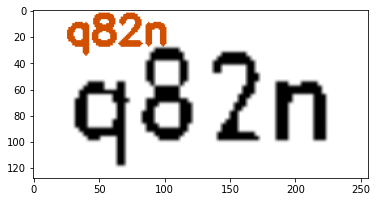

Captcha q82n


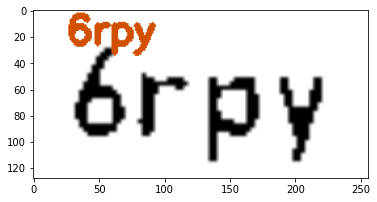

Captcha 6rpy


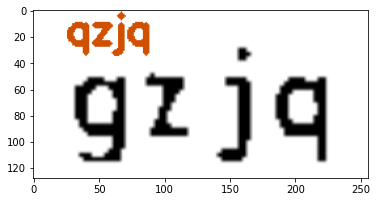

Captcha qzjq


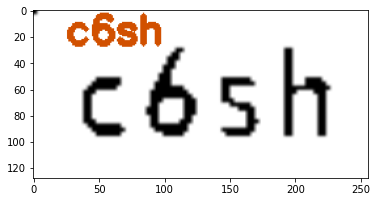

Captcha c6sh


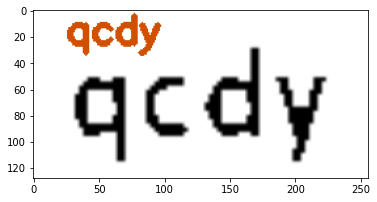

Captcha qcdy


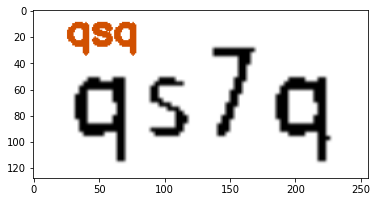

Captcha qsq


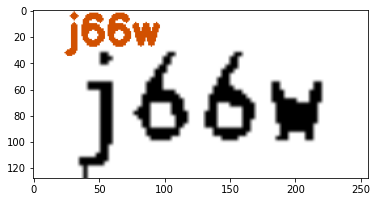

Captcha j66w


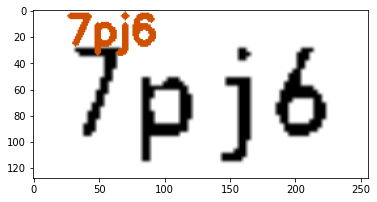

Captcha 7pj6


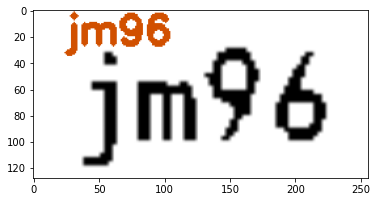

Captcha jm96


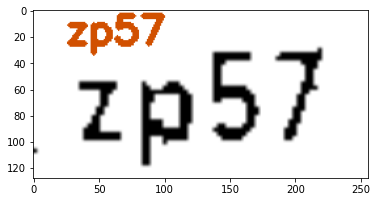

Captcha zp57


In [12]:

solved_captchas_dir = "solved_captchas"

import os
if not os.path.exists(solved_captchas_dir):
    os.makedirs(solved_captchas_dir)

for result in results:
     img=result[0]
     name=result[1]
     cv2.imwrite(f'{solved_captchas_dir}/{name}.png',img)

     plt.imshow(img)
     plt.show()
     print('Captcha',result[1])
     
